In [27]:
# Utility libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler

# Dimension reduction
from sklearn.decomposition import PCA

%matplotlib inline

Data set is of credit card defaulters from Taiwan. bill_amnt is amount they spent on their credit cards everymonth, pay_amt is how much they paid for a given month

In [10]:
df = pd.read_csv('./cont_vars_credit.csv')
df.head(3)

,age,limit_bal,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,36,220000,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779
1,29,200000,326,326,326,326,326,326,326,326,326,326,326,326
2,27,180000,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Scale the data

scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(df), columns = df.columns)
X.head(3)

/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/TjH/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,limit_bal,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,0.059764,0.407705,2.298178,2.401353,2.443746,2.753069,2.323672,2.436767,0.262938,0.084016,0.267837,0.076423,0.394744,7.742693
1,-0.698022,0.253696,-0.686596,-0.681832,-0.668172,-0.665625,-0.656302,-0.646274,-0.318859,-0.230674,-0.271739,-0.281428,-0.292747,-0.275056
2,-0.914533,0.099686,-0.690974,-0.686363,-0.672834,-0.670671,-0.661654,-0.651729,-0.338464,-0.244011,-0.289697,-0.301967,-0.313769,-0.293276


In [19]:
pca = PCA()

In [20]:
# Fit the PCA 
principalComponents = pca.fit_transform(X)

array([[ 6.63832329e+00,  1.02901666e+00, -5.80193224e-01, ...,
         1.64639540e-01, -3.09790450e-01,  1.94380693e-01],
       [-1.71841746e+00, -3.31965025e-02,  3.03052127e-01, ...,
         2.08455831e-02,  3.20642520e-03,  6.09329472e-03],
       [-1.77617785e+00, -1.24720542e-01,  5.41283630e-01, ...,
         1.97527248e-02,  3.14562847e-03,  5.47362455e-03],
       ...,
       [-1.51305572e+00,  1.70596398e-01, -9.56028436e-01, ...,
         3.03682261e-02,  2.43005666e-03,  1.10986227e-02],
       [-1.75263629e+00, -1.27880465e-01, -9.44308073e-01, ...,
         4.27135324e-05, -2.11578840e-03, -2.19969420e-02],
       [-1.36618170e+00, -4.74078893e-01,  1.32465570e+00, ...,
        -6.24945092e-03, -1.57688221e-03,  2.80425713e-03]])

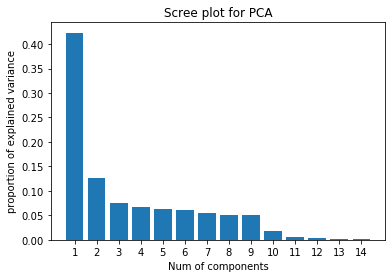

In [38]:
# Scree Plot
index = list(range(1,15))
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')
plt.xticks(ticks=range(1,15), labels=range(1,15));

In [39]:
# Pull out the values and vectors
eig_values = pca.explained_variance_
eig_vectors = pca.components_


# Look at the first two components
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [23]:
# Get the loadings/coefficients of PCA
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=df.columns)
str_loading_1.sort_values(ascending=False)

# Fiscal Irresponsibility

bill_amt4    0.951905
bill_amt5    0.943950
bill_amt3    0.941926
bill_amt2    0.932779
bill_amt6    0.924579
bill_amt1    0.909715
limit_bal    0.409225
pay_amt1     0.324989
pay_amt3     0.321919
pay_amt4     0.294453
pay_amt2     0.278817
pay_amt5     0.278361
pay_amt6     0.253368
age          0.081766
dtype: float64

In [37]:
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=df.columns)
str_loading_2.sort_values(ascending=False)

# Fiscal Responsibility

pay_amt2     0.547170
pay_amt1     0.533474
pay_amt3     0.529877
pay_amt4     0.471940
pay_amt6     0.428297
pay_amt5     0.376389
limit_bal    0.363588
age          0.081965
bill_amt6   -0.132371
bill_amt5   -0.149001
bill_amt4   -0.164359
bill_amt3   -0.164483
bill_amt2   -0.222525
bill_amt1   -0.244326
dtype: float64